# Code for running MFP data and the Volunteer data

## MFP data processing example

In [2]:
import pandas as pd
import numpy as np
import gurobipy as gp
# import dill
from gurobipy import GRB

In [3]:
#load input MFP file
tsv_file_path = 'MyFitnessPal data-Farzin/Data/mfp-diaries.tsv' #change to your directory
data_frame = pd.read_csv(tsv_file_path, sep='\t')
data_frame

,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"": [{""name"": ""Calories"", ""value"": ""412""}, {""name"": ""Carbs"", ""value"": ""29""}, {""name"": ""Fat"", ""value"": ""24""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""258""}, {""name"": ""Sugar"", ""value"": ""29""}], ""name"": ""my - McDonalds Espresso Pronto\u00ae Flat White, 2 TALL""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""176""}, {""name"": ""Carbs"", ""value"": ""33""}, {""name"": ""Fat"", ""value"": ""1""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""195""}, {""name"": ""Sugar"", ""value"": ""0""}], ""name"": ""Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""342""}, {""name"": ""Carbs"", ""value"": ""34""}, {""name"": ""Fat"", ""value"": ""12""}, {""name"": ""Protein"", ""value"": ""24""}, {""name"": ""Sodium"", ""value"": ""402""}, {""name"": ""Sugar"", ""value"": ""34""}], ""name"": ""Pauls - Smarter White Milk, 600 ml""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""22""}, {""name"": ""Fat"", ""value"": ""7""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""310""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Quest Bar - Cookies and Cream, 1 bar""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""46""}, {""name"": ""Fat"", ""value"": ""0""}, {""name"": ""Protein"", ""value"": ""0""}, {""name"": ""Sodium"", ""value"": ""100""}, {""name"": ""Sugar"", ""value"": ""22""}], ""name"": ""Gu Sports - Chomps, 8 pieces""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""160""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""240""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest - Protein Bar Chocolate Peanut Butter, 1 bar (60 g)""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""686""}, {""name"": ""Carbs"", ""value"": ""59""}, {""name"": ""Fat"", ""value"": ""31""}, {""name"": ""Protein"", ""value"": ""40""}, {""name"": ""Sodium"", ""value"": ""1,105""}, {""name"": ""Sugar"", ""value"": ""9""}], ""name"": ""Grilld - Simply Grilled (Real), 1.25 burger""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""252""}, {""name"": ""Carbs"", ""value"": ""27""}, {""name"": ""Fat"", ""value"": ""14""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""352""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Grilld - Snack Chips, 1 snack size""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""196""}, {""name"": ""Carbs"", ""value"": ""15""}, {""name"": ""Fat"", ""value"": ""10""}, {""name"": ""Protein"", ""value"": ""10""}, {""name"": ""Sodium"", ""value"": ""176""}, {""name"": ""Sugar"", ""value"": ""7""}], ""name"": ""Tasti - Salted Caramel Protein Bar, 40 g""}], ""sequence"": 1}]","{""total"": [{""name"": ""Calories"", ""value"": 2924}, {""name"": ""Carbs"", ""value"": 340}, {""name"": ""Fat"", ""value"": 114}, {""name"": ""Protein"", ""value"": 186}, {""name"": ""Sodium"", ""value"": 3658}, {""n

In [4]:
# creating a dataframe with all the data structured in 4 columns
current_column_names = data_frame.columns
new_column_names = {
    current_column_names[0]: 'ID',
    current_column_names[1]: 'Date',
    current_column_names[2]: 'Log',
    current_column_names[3]: 'Nutrients',
}

# Rename the columns using the rename() method
data_frame = data_frame.rename(columns=new_column_names)
data_frame

,ID,Date,Log,Nutrients
0,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
1,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
2,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
3,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."
4,1,2014-09-19,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2158}..."
...,...,...,...,...
587181,9897,2015-03-02,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 1979}..."
587182,9897,2015-03-03,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2141}..."
587183,9897,2015-03-04,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 543},..."
587184,9897,2015-03-14,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2024}..."


In [5]:
#Finding all nutrient types existing in the dataset
import pandas as pd
import json
# Assuming your DataFrame is named 'data_frame'
nutrient_names = set()

# Iterate through each row and extract nutrient names
for index, row in data_frame.iterrows():
    nutrient_data = json.loads(row['Nutrients'])
    if 'total' in nutrient_data:
        for nutrient in nutrient_data['total']:
            name = nutrient.get('name', None)
            if name:
                nutrient_names.add(name)
# Convert the set of nutrient names to a list if needed
nutrient_names_list = list(nutrient_names)

print(nutrient_names_list)

['Chol', 'Sugar', 'Trn Fat', 'Calories', 'Fiber', 'Iron', 'Sat Fat', 'Potass.', 'Calcium', 'Mon Fat', 'Ply Fat', 'Sodium', 'Vit C', 'Vit A', 'Protein', 'Fat', 'Carbs']


In [7]:
#choose user_ID and choose a day of their intake for illustration and analysis purposes
user_ID = 1000
day_of_intake = 10
# The given JSON-like string
data_str = data_frame[data_frame.ID == user_ID].Log[data_frame[data_frame.ID == user_ID].Log.index[day_of_intake]]
# Convert the JSON-like string to a Python dictionary
data_dict = json.loads(data_str)
# Display the resulting dictionary
data_dict

[{'meal': 'Breakfast',
  'dishes': [{'nutritions': [{'name': 'Calories', 'value': '120'},
     {'name': 'Carbs', 'value': '20'},
     {'name': 'Fat', 'value': '2'},
     {'name': 'Protein', 'value': '4'},
     {'name': 'Sodium', 'value': '0'},
     {'name': 'Sugar', 'value': '0'}],
    'name': 'Generic - Quaker Quick Oats, 1/3 cup'},
   {'nutritions': [{'name': 'Calories', 'value': '23'},
     {'name': 'Carbs', 'value': '3'},
     {'name': 'Fat', 'value': '1'},
     {'name': 'Protein', 'value': '3'},
     {'name': 'Sodium', 'value': '47'},
     {'name': 'Sugar', 'value': '1'}],
    'name': 'Pb2 - Pb2 Peanut Butter, Powdered, 1 tablespoons'},
   {'nutritions': [{'name': 'Calories', 'value': '70'},
     {'name': 'Carbs', 'value': '9'},
     {'name': 'Fat', 'value': '5'},
     {'name': 'Protein', 'value': '0'},
     {'name': 'Sodium', 'value': '5'},
     {'name': 'Sugar', 'value': '6'}],
    'name': 'Hersheys - Dark Chocolate Chips, 1 Tbs'},
   {'nutritions': [{'name': 'Calories', 'value'

In [9]:
# deducing goals from the data
Nutrient_dict = json.loads(data_frame[data_frame.ID == user_ID].Nutrients[data_frame[data_frame.ID == user_ID].Log.index[day_of_intake]])
goals = Nutrient_dict['goal']
goals

[{'name': 'Calories', 'value': 1800},
 {'name': 'Carbs', 'value': 158},
 {'name': 'Fat', 'value': 60},
 {'name': 'Protein', 'value': 158},
 {'name': 'Sodium', 'value': 2300},
 {'name': 'Sugar', 'value': 70}]

In [10]:
#creating a dataframe of the day of intake, this is ready for for optimization
for i in range(0,len(data_dict)):
    data = data_dict[i]
    # Extracting the meal and dishes data
    meal = data['meal']
    dishes = data['dishes']

    # Creating a list of dictionaries to hold nutrient data
    nutrient_data = []

    # Loop through each dish and extract nutrient data
    for dish in dishes:
        dish_name = dish['name']
        nutrients = dish['nutritions']
        nutrient_dict = {'meal': meal, 'dishes': dish_name}
        for nutrient in nutrients:
            nutrient_dict[nutrient['name']] = nutrient['value']
        nutrient_data.append(nutrient_dict)

    # Creating the DataFrame
    if i == 0: df = pd.DataFrame(nutrient_data)
    #else: df = df.append(pd.DataFrame(nutrient_data), ignore_index=True)
    else: df = pd.concat([df, pd.DataFrame(nutrient_data)], ignore_index=True)

#convert values to floats
nutrient_columns = list(df.columns[2:])
# Convert the specified columns to float
df[nutrient_columns] = df[nutrient_columns].astype(float)
# Displaying the DataFrame
df


,meal,dishes,Calories,Carbs,Fat,Protein,Sodium,Sugar
0,Breakfast,"Generic - Quaker Quick Oats, 1/3 cup",120.0,20.0,2.0,4.0,0.0,0.0
1,Breakfast,"Pb2 - Pb2 Peanut Butter, Powdered, 1 tablespoons",23.0,3.0,1.0,3.0,47.0,1.0
2,Breakfast,"Hersheys - Dark Chocolate Chips, 1 Tbs",70.0,9.0,5.0,0.0,5.0,6.0
3,Breakfast,"Dairy - Egg White Pc Blue Menu, 1/4 cup",30.0,0.0,0.0,7.0,120.0,0.0
4,Lunch,"Maple Leaf Prime - Breaded Chicken Burgers, 1 ...",190.0,13.0,10.0,12.0,340.0,2.0
5,Lunch,"Compliments - In the Thin - Multigrain Bun, 1 bun",170.0,32.0,2.0,7.0,270.0,3.0
6,Lunch,"Kraft - Miracle Whip, Calorie-wise, 15 mL (1 t...",30.0,3.0,2.0,0.0,140.0,2.0
7,Lunch,Optimum Nutrition Protein Shake Strawberry - O...,220.0,4.0,2.0,48.0,260.0,2.0
8,Dinner,"Loblaws Bbq - Chicken, 100 g",210.0,0.0,12.0,26.0,350.0,0.0
9,Dinner,"Rice - Brown, medium-grain, cooked, 0.75 cup",164.0,34.0,1.0,3.0,1.0,0.0


## IO Analysis on MFP data with moving feasible sets

In [21]:
#calculating left hand side matrix of the nutritional constraints
AT = df.iloc[:, 2:].astype('float').to_numpy()
AT  = np.column_stack((AT, -AT))
A = AT.T
X0 = np.ones(len(df))
A.shape

(12, 16)

In [22]:
def IO_one_observation(A,b,X):
    m1 = A.shape[0]
    n = A.shape[1]
    AT = A.T
    num_var = 2 * n + 3 * n + m1
    m = gp.Model("IO")
    m.Params.timeLimit = 100.0
    m.Params.OutputFlag = 0
    # Create variables
    e = m.addVars(n,  lb=-GRB.INFINITY, name = 'e')
    t = m.addVars(n,  lb=-GRB.INFINITY, name = 't')
    c = m.addVars(n,  lb=-GRB.INFINITY, name = 'c')
    y = m.addVars(m1,  lb=-GRB.INFINITY, name = 'y')
    d = m.addVars(n,  lb=-GRB.INFINITY, name = 'd')
    z = m.addVars(n, ub =2, name = 'z')
    #z = m.addVars(n, ub =6, vtype=gp.GRB.INTEGER, name = 'z')
    # Set objective:
    m.setObjective(gp.quicksum(t[i] for i in range(n)), GRB.MINIMIZE)
    # Constraints
    m.addConstrs(t[i] >= e[i] for i in range(n))
    m.addConstrs(t[i] >= -e[i] for i in range(n))
    m.addConstrs(X[i] - e[i]  == z[i] for i in range(n))
    for j in range(m1):
        m.addConstr(gp.quicksum(A[j,i] * z[i] for i in range(n)) <= b[j])
    for i in range(n):
        m.addConstr(gp.quicksum(y[j] * A[j,i] for j in range(m1)) == c[i])    
    m.addConstrs(y[j] >= 0 for j in range(m1))
    m.addConstr(gp.quicksum(c[j] * z[j] for j in range(n)) == gp.quicksum(b[i] * y[i] for i in range(m1)))
    #for i in range(n):
    #    m.addConstr(d[i] == gp.abs_(c[i]))
    #m.addConstr(gp.quicksum(d[i] for i in range(n)) == 1) 
    m.addConstr(gp.quicksum(y[j]  for j in range(m1)) == 1)
    #m.addConstr(z[14] == 0) #no_egg_omelette_substitute
    #m.addConstr(z[26] == 0) #no_meat_substitute
    m.params.NonConvex = 2   
    m.optimize()
    vars = m.getVars()
    #for i in range (n):
    #    print (vars [num_var -1 -(n-1-i)])
#     n = A.shape[1]
    Z = np.zeros (n)
    C = np.zeros (n)
    count = 0
    for v in z.values():
        Z[count] = v.X
        count += 1
    count = 0
    for v in c.values():
        C[count] = v.X
        count += 1
    return Z, C

In [24]:
# all intervention predefined macro and micro nutrient levels based on the person
diet_macros = {
    'Dash': {'Carbs': (50, 60), 'Protein': (15, 20), 'Fat': (25, 30), 'Sodium': (1000,1600)},
    'Low-Carb': {'Carbs': (10, 20), 'Protein': (15, 50), 'Fat': (40, 80)},
    'Low-Fat': {'Carbs': (55, 70), 'Protein': (15, 25), 'Fat': (5, 20)},
    'Keto': {'Carbs': (5, 10), 'Protein': (15, 35), 'Fat': (60, 80)},
    'Mediterranean': {'Carbs': (45, 55), 'Protein': (15, 25), 'Fat': (30, 40)}
}

calories = df['Calories'].values.astype(float).sum()/100  # You can replace this with your desired value

def modify_macros(diet_dict, calories):
    for diet, macros in diet_dict.items():
        for nutrient, value_range in macros.items():
            lower, upper = value_range
            # Multiply by calories
            if nutrient != 'Sodium':
                macros[nutrient] = (lower * calories, upper * calories)
            # Divide by 4 for 'Carbs' and 'Protein', and divide by 9 for 'Fat'
            if nutrient == 'Carbs' or nutrient == 'Protein':
                macros[nutrient] = (macros[nutrient][0] / 4, macros[nutrient][1] / 4)
            elif nutrient == 'Fat':
                macros[nutrient] = (macros[nutrient][0] / 9, macros[nutrient][1] / 9)
            # Round the values to 2 decimal places
            macros[nutrient] = (round(macros[nutrient][0], 2), round(macros[nutrient][1], 2))

modify_macros(diet_macros, calories)
diet_macros

{'Dash': {'Carbs': (227.75, 273.3),
  'Protein': (68.32, 91.1),
  'Fat': (50.61, 60.73),
  'Sodium': (1000, 1600)},
 'Low-Carb': {'Carbs': (45.55, 91.1),
  'Protein': (68.32, 227.75),
  'Fat': (80.98, 161.96)},
 'Low-Fat': {'Carbs': (250.52, 318.85),
  'Protein': (68.32, 113.88),
  'Fat': (10.12, 40.49)},
 'Keto': {'Carbs': (22.78, 45.55),
  'Protein': (68.32, 159.42),
  'Fat': (121.47, 161.96)},
 'Mediterranean': {'Carbs': (204.98, 250.52),
  'Protein': (68.32, 113.88),
  'Fat': (60.73, 80.98)}}

In [25]:
# Selecting intervention

#mode = 'weight-loss'
#mode = 'Dash'
mode = 'Mediterranean'
#mode = 'Low-Carb'
#mode = 'Low-Fat'

In [26]:
#creating habits
b = np.zeros (2*len(df.columns[2:]))
nut = 0
if mode == 'weight-loss':
    b = np.zeros (2*len(df.columns[2:]))
    nut = 0
    for column in df.columns[2:]:
        b[nut] = 0.9*df[column].values.astype(float).sum()
        b[nut+len(df.columns[2:])] = -0.7*df[column].values.astype(float).sum()
        nut+=1
else:
    for column in df.columns[2:]:
        if column in diet_macros[mode].keys():
            b[nut] = diet_macros[mode][column][1]
            b[nut+len(df.columns[2:])] = -diet_macros[mode][column][0]
        else:
            b[nut] = df[column].values.astype(float).sum()
            b[nut+len(df.columns[2:])] = -0.7*df[column].values.astype(float).sum()
        nut+=1
    

In [27]:
nut = 0
for column in df.columns[2:]:
    print(column,'UB =',b[nut])
    print(column,'LB =',-b[nut+len(df.columns[2:])])
    nut+=1

Calories UB = 1822.0
Calories LB = 1275.3999999999999
Carbs UB = 250.52
Carbs LB = 204.98
Fat UB = 80.98
Fat LB = 60.73
Protein UB = 113.88
Protein LB = 68.32
Sodium UB = 2316.0
Sodium LB = 1621.1999999999998
Sugar UB = 44.0
Sugar LB = 30.799999999999997


In [29]:
#dicts to store recommendations ,cost vectors, intermediary right hand sides
Xi = {}
Ci= {}
bi = {}
Xi[0] = X0
bi[0] = b
Xi

{0: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [31]:
r = 4 # number of intermediary interventions
for j in range (r):
    bi[j] = b.copy()
for i in range (b.shape[0]):
    if np.dot(A,Xi[0])[i]- b[i] > 0:
        bi[0][i] = np.dot(A,Xi[0])[i]
        for j in range (r-1):
            bi[j+1][i] = bi[0][i]- (j+1)*(np.dot(A,Xi[0])[i]- b[i])/r
bi[r] = b.copy()  
bi

{0: array([ 1822.  ,   250.52,    80.98,   157.  ,  2316.  ,    44.  ,
        -1275.4 ,  -175.  ,   -56.  ,   -68.32, -1621.2 ,   -30.8 ]),
 1: array([ 1822.    ,   250.52  ,    80.98  ,   146.22  ,  2316.    ,
           44.    , -1275.4   ,  -182.495 ,   -57.1825,   -68.32  ,
        -1621.2   ,   -30.8   ]),
 2: array([ 1822.   ,   250.52 ,    80.98 ,   135.44 ,  2316.   ,    44.   ,
        -1275.4  ,  -189.99 ,   -58.365,   -68.32 , -1621.2  ,   -30.8  ]),
 3: array([ 1822.    ,   250.52  ,    80.98  ,   124.66  ,  2316.    ,
           44.    , -1275.4   ,  -197.485 ,   -59.5475,   -68.32  ,
        -1621.2   ,   -30.8   ]),
 4: array([ 1822.  ,   250.52,    80.98,   113.88,  2316.  ,    44.  ,
        -1275.4 ,  -204.98,   -60.73,   -68.32, -1621.2 ,   -30.8 ])}

In [32]:
# running the IO model for the r levels
for i in range (r):
    Xi[i+1], Ci[i+1] = IO_one_observation(A,bi[i+1],Xi[i])

Restricted license - for non-production use only - expires 2024-10-28
Set parameter TimeLimit to value 100
Set parameter TimeLimit to value 100
Set parameter TimeLimit to value 100
Set parameter TimeLimit to value 100


In [33]:
#diet values
Xi

{0: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 1: array([1.        , 1.        , 1.        , 1.        , 1.15445759,
        1.        , 1.        , 0.72191201, 1.        , 1.1941001 ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 2: array([1.        , 1.        , 1.        , 1.        , 1.30891518,
        1.        , 1.        , 0.44382402, 1.        , 1.38820019,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 3: array([1.        , 1.        , 1.        , 1.        , 1.46337276,
        1.        , 1.        , 0.16573603, 1.        , 1.58230029,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 4: array([1.        , 1.        , 1.        , 1.        , 1.46347775,
        1.        , 1.        , 0.        , 1.        , 1.77045511,
        1.        , 1.1212019 , 1.        , 1.        , 1.12206744,
        0.86515135])}

In [34]:
# Rounding all values in the dictionary to 2 decimal places
rounded_data_dict = {k: np.round(v, 2) for k, v in Xi.items()}
Xi = rounded_data_dict

In [37]:
# setting up more professional formatting of figures, feel free to comment out
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
from matplotlib import rc
rc("text", usetex=False)

# setting nutrient names for this specific day
nutrient_names = list(df.columns[2:])
# calculating nutrient values for all nutrients and all diets
nutrient_values = {}
for key in Xi.keys():
    nutrient_values[key] = np.dot(A,Xi[key])[0:6]
nutrient_values

{0: array([1822.,  175.,   56.,  157., 2316.,   44.]),
 1: array([1820.06,  182.29,   57.13,  145.93, 2294.39,   43.74]),
 2: array([1821.66,  190.05,   58.37,  135.01, 2276.19,   43.5 ]),
 3: array([1821.92,  197.38,   59.52,  124.42, 2257.18,   43.26]),
 4: array([1821.58,  204.91,   60.68,  113.95, 2223.13,   43.98])}

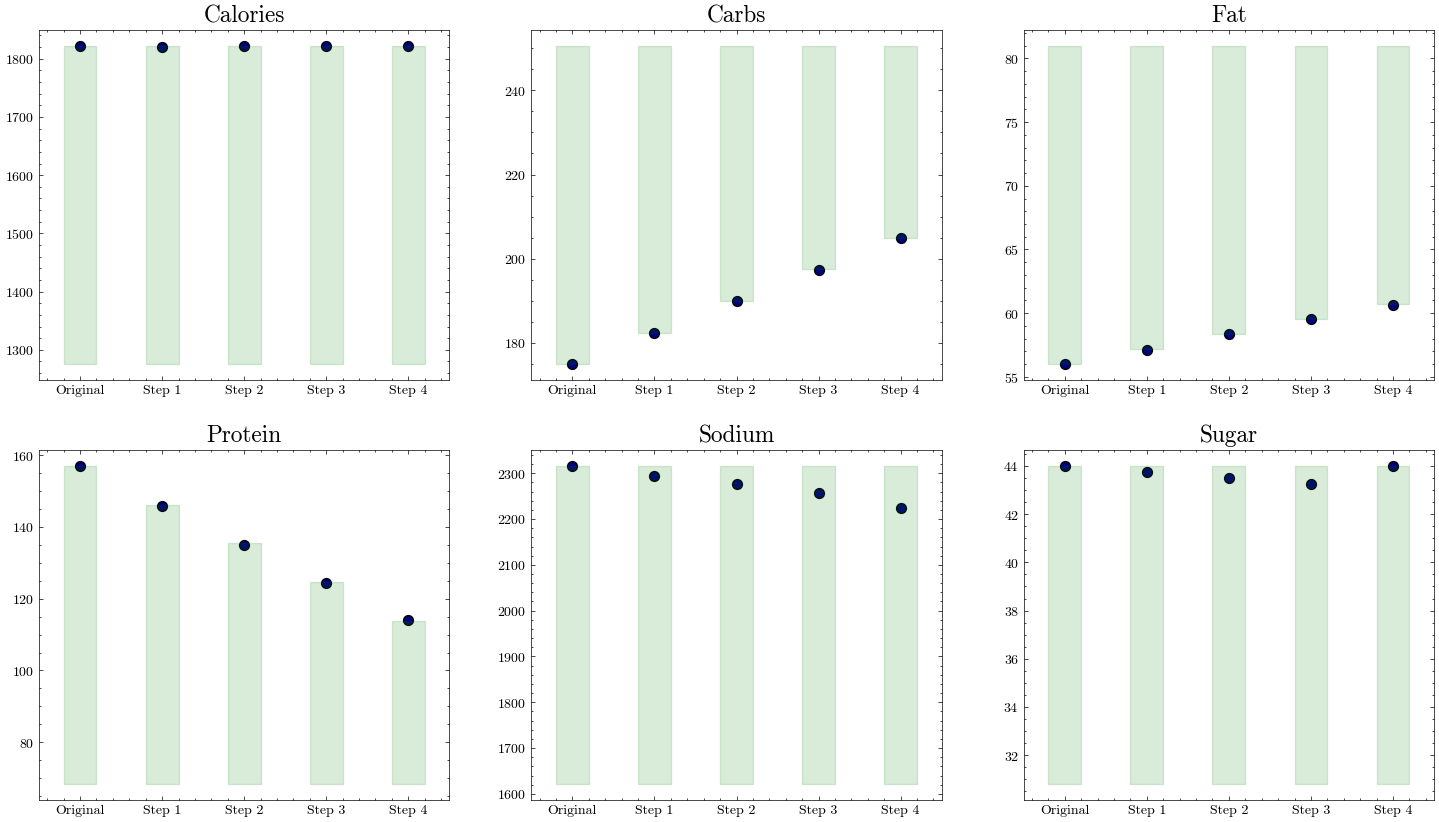

In [38]:
# setting up more professional formatting of figures, feel free to comment out
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
from matplotlib import rc
rc("text", usetex=False)

a = 2
z = 3
fig, axs = plt.subplots(a,z,figsize=(18, 10))
x_axis = ['Original','Step 1','Step 2','Step 3','Step 4']
s = 50
plt.rcParams.update({'font.size': 14})
nut = 0
for k in range (a):
    for m in range(z):
        axs[k,m].boxplot([[],[],[],[],[]],labels = x_axis,widths = 0.7)
        for i in range(len(list(Xi.keys()))):
            axs[k,m].scatter(list(Xi.keys())[i]+1,np.dot(A,Xi[i])[nut] , s=s, edgecolor="black",c="navy") 
            axs[k,m].fill_between([i+0.8,i+1.2], -bi[i][nut+6], bi[i][nut], color='green',alpha = 0.15)
        axs[k,m].set(title=nutrient_names[nut])
        #axs[k,m].fill_between([0.8,5.2], -b[nut+6], b[nut], color='green',alpha = 0.15)
        nut += 1
    
#plt.savefig(mode+'_Diet_nutrients1_MFP.pdf') 
#plt.savefig(mode+'_Diet_nutrients1_MFP.png')  

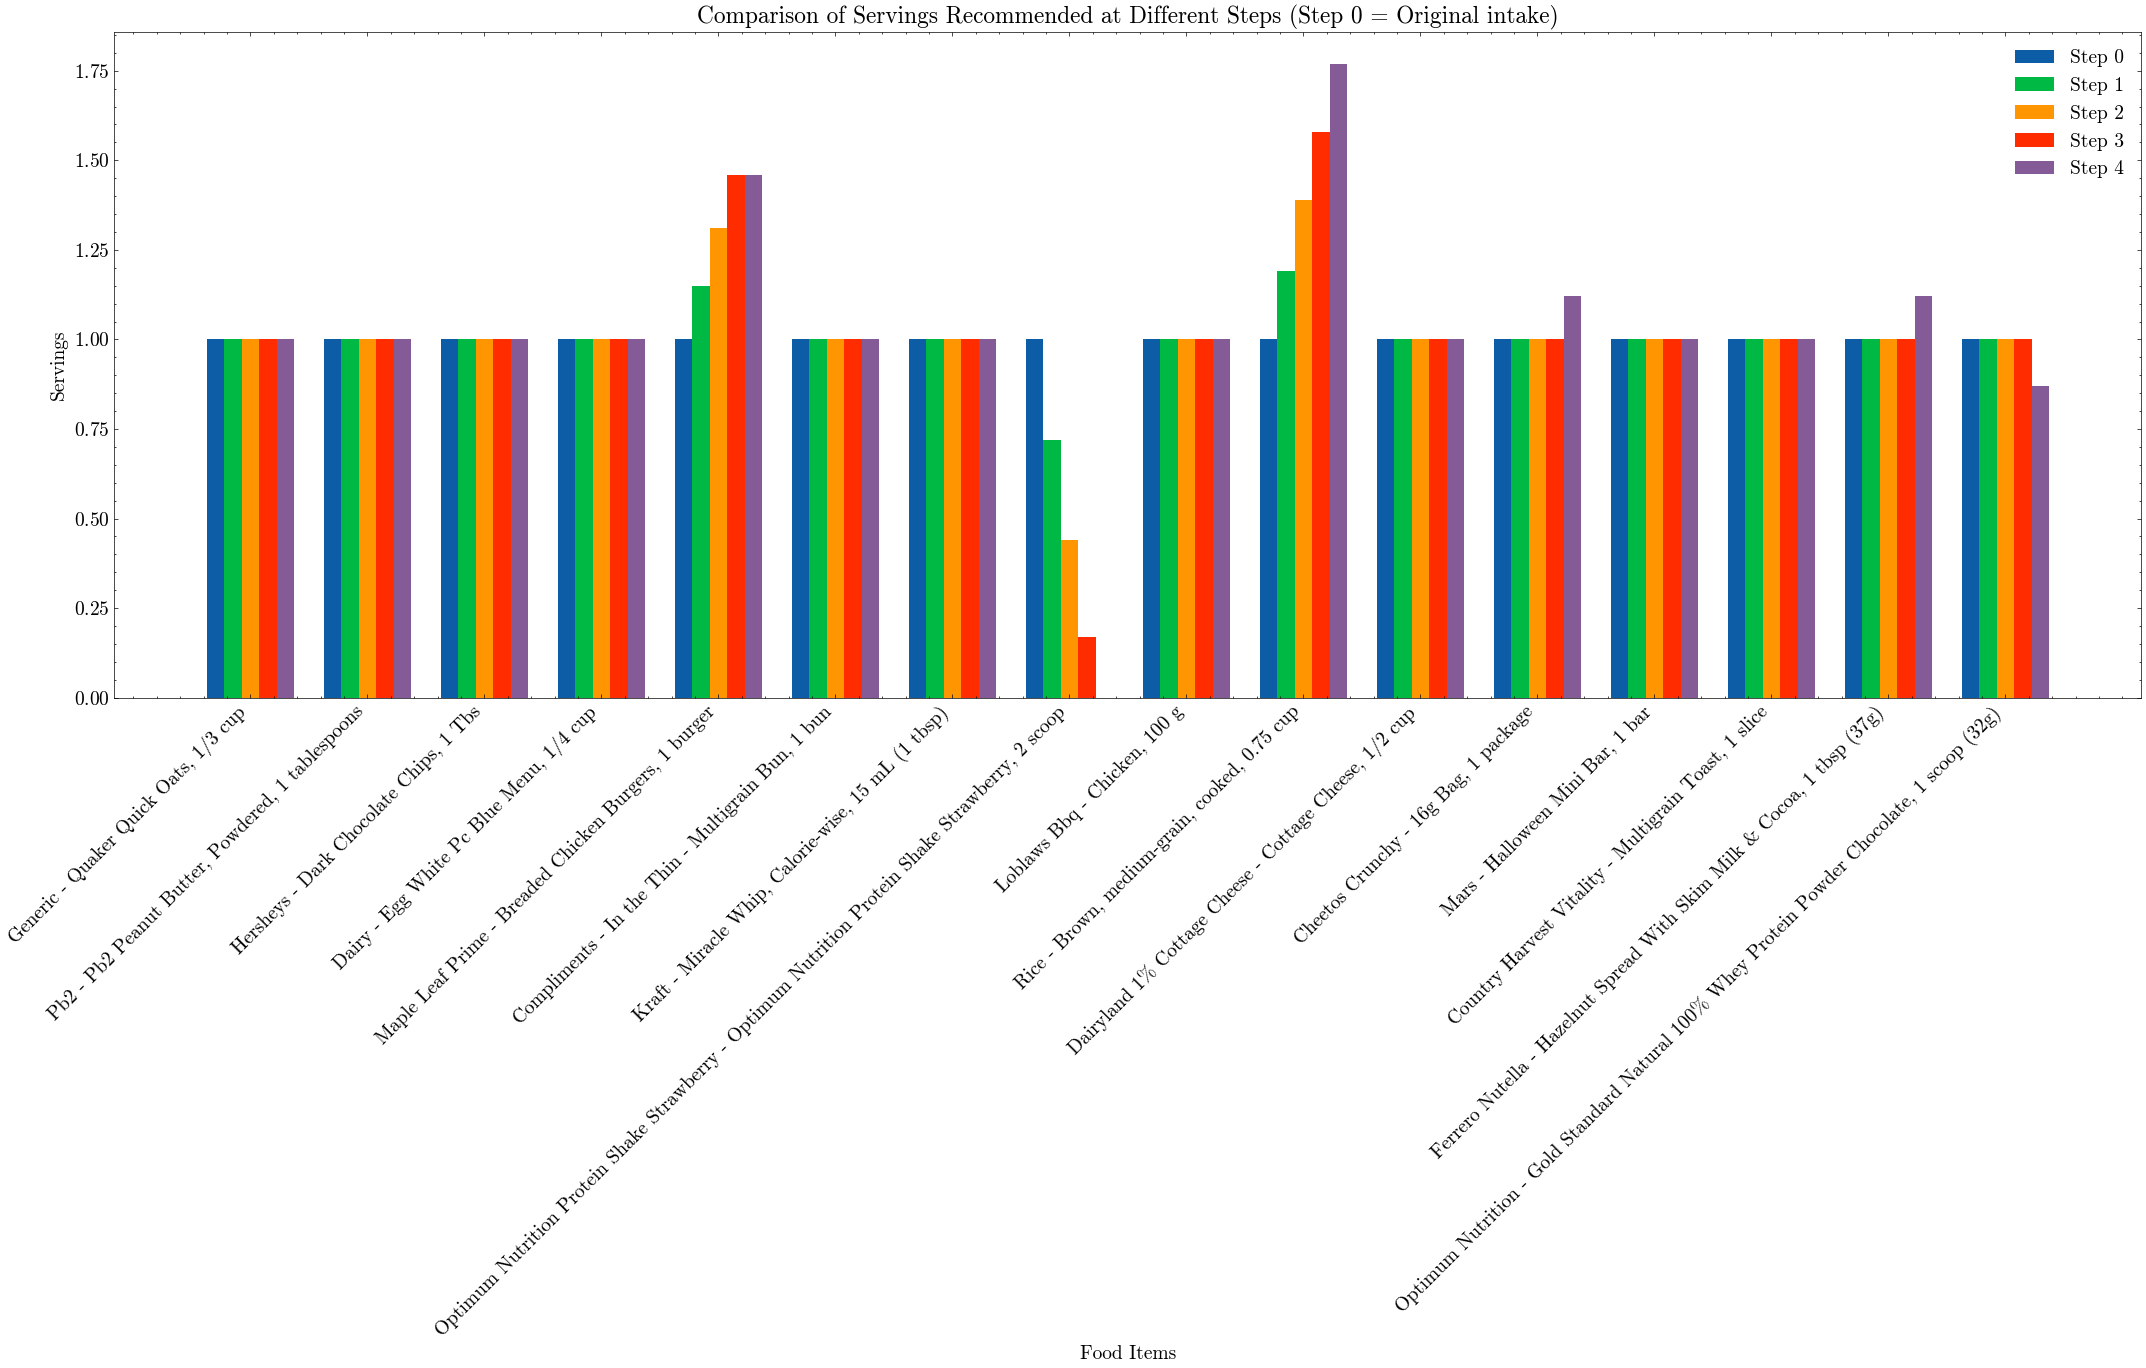

In [40]:
food_names = list(df.dishes)

# Data from the dictionary
data = Xi
food_items = food_names

# Number of groups and bar width
n_groups = len(food_items)
bar_width = 0.15

# Set up the figure and the axes
fig, ax = plt.subplots(figsize=(22, 14))

# Create bars for each recommendation system
for i in range(len(data)):
    index = np.arange(n_groups) + i * bar_width
    ax.bar(index, data[i], bar_width, label=f'Step {i}')

# Add the food item names as x-ticks
ax.set_xticks(np.arange(n_groups) + bar_width * 2)
ax.set_xticklabels(food_items, rotation=45, ha='right')

# Labels and Title
ax.set_xlabel('Food Items')
ax.set_ylabel('Servings')
ax.set_title('Comparison of Servings Recommended at Different Steps (Step 0 = Original intake)')

# Legend
ax.legend()


# Show the plot
#plt.savefig(mode+'_Diet_fooditems1_MFP.pdf') 
#plt.savefig(mode+'_Diet_fooditems1_MFP.png') 
plt.tight_layout()
plt.show()


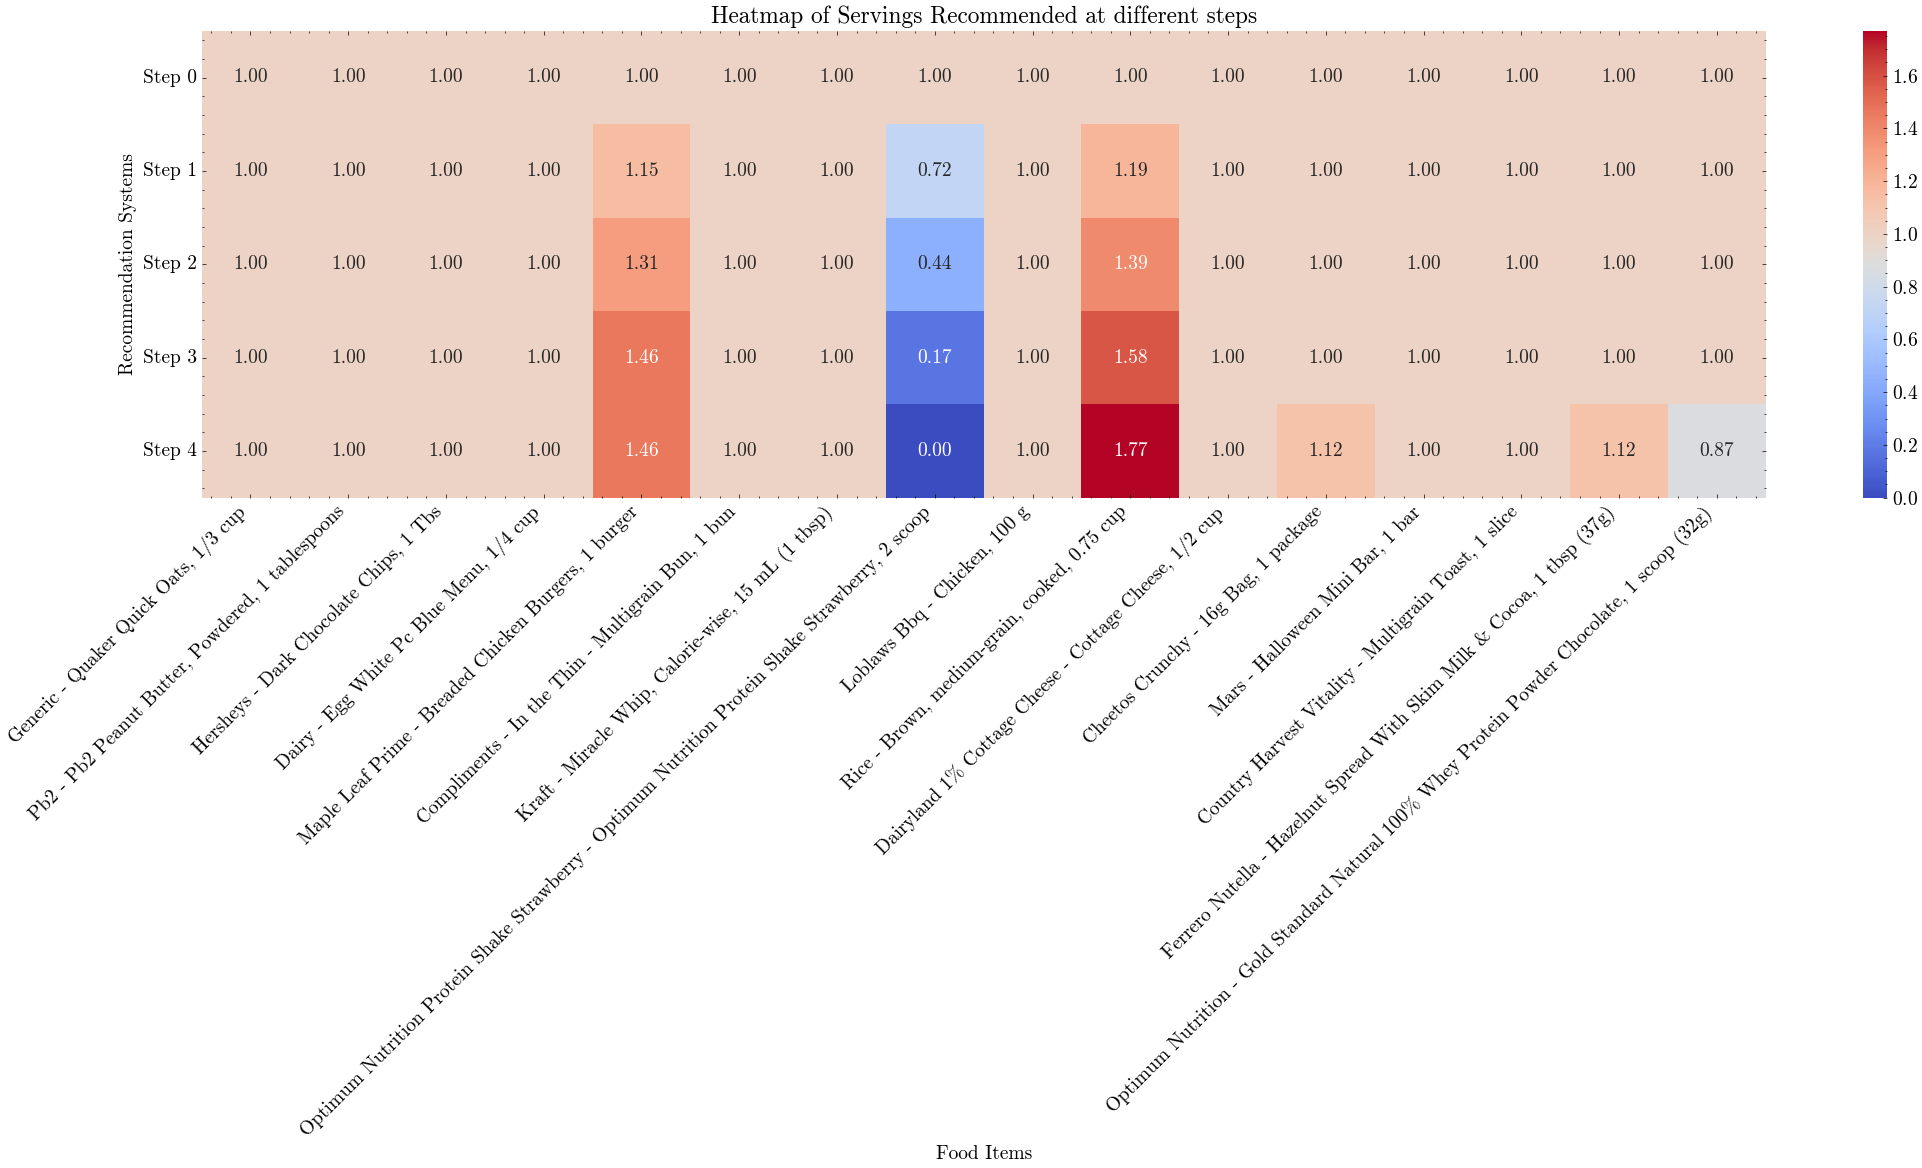

In [41]:
import seaborn as sns

# Convert the data into a format suitable for a heatmap
heatmap_data = np.array([data[i] for i in range(len(data))])

# Create a heatmap
plt.figure(figsize=(22, 12))
plt.rcParams.update({'font.size': 14})
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=food_items, yticklabels=[f'Step {i}' for i in range(len(data))])

# Add labels and title
plt.title('Heatmap of Servings Recommended at different steps')
plt.xlabel('Food Items')
plt.ylabel('Recommendation Systems')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything
#plt.savefig(mode+'_Diet_fooditems2_MFP.pdf') 
#plt.savefig(mode+'_Diet_fooditems2_MFP.png')
plt.show()


In [42]:
## Volunteer analysis

In [43]:
import gurobipy as gp
import dill
from gurobipy import GRB
def IO_one_observation(A,b,X):
    m1 = A.shape[0]
    n = A.shape[1]
    AT = A.T
    num_var = 2 * n + 3 * n + m1
    e = gp.Env(empty=True)
    e.setParam('WLSACCESSID', 'aee9347f-b4d4-4058-a8c2-a0c6954ea740')
    e.setParam('WLSSECRET', '30cef1f9-9233-48a0-a138-9d092ef2ce32')
    e.setParam('LICENSEID', 862033)
    e.start()
    m = gp.Model("IO",env=e)
    #m.Params.timeLimit = 100.0
    m.Params.OutputFlag = 0
    # Create variables
    e = m.addVars(n,  lb=-GRB.INFINITY, name = 'e')
    t = m.addVars(n,  lb=-GRB.INFINITY, name = 't')
    c = m.addVars(n,  lb=-GRB.INFINITY, name = 'c')
    y = m.addVars(m1,  lb=-GRB.INFINITY, name = 'y')
    d = m.addVars(n,  lb=-GRB.INFINITY, name = 'd')
    z = m.addVars(n, ub =2, name = 'z')
    #z = m.addVars(n, ub =6, vtype=gp.GRB.INTEGER, name = 'z')
    # Set objective:
    m.setObjective(gp.quicksum(t[i] for i in range(n)), GRB.MINIMIZE)
    # Constraints
    m.addConstrs(t[i] >= e[i] for i in range(n))
    m.addConstrs(t[i] >= -e[i] for i in range(n))
    m.addConstrs(X[i] - e[i]  == z[i] for i in range(n))
    for j in range(m1):
        m.addConstr(gp.quicksum(A[j,i] * z[i] for i in range(n)) <= b[j])
    for i in range(n):
        m.addConstr(gp.quicksum(y[j] * A[j,i] for j in range(m1)) == c[i])    
    m.addConstrs(y[j] >= 0 for j in range(m1))
    m.addConstr(gp.quicksum(c[j] * z[j] for j in range(n)) == gp.quicksum(b[i] * y[i] for i in range(m1)))
    #for i in range(n):
    #    m.addConstr(d[i] == gp.abs_(c[i]))
    #m.addConstr(gp.quicksum(d[i] for i in range(n)) == 1) 
    m.addConstr(gp.quicksum(y[j]  for j in range(m1)) == 1)
    #m.addConstr(z[14] == 0) #no_egg_omelette_substitute
    #m.addConstr(z[26] == 0) #no_meat_substitute
    m.params.NonConvex = 2   
    m.optimize()
    vars = m.getVars()
    #for i in range (n):
    #    print (vars [num_var -1 -(n-1-i)])
#     n = A.shape[1]
    Z = np.zeros (n)
    C = np.zeros (n)
    count = 0
    for v in z.values():
        Z[count] = v.X
        count += 1
    count = 0
    for v in c.values():
        C[count] = v.X
        count += 1
    return Z, C

In [44]:
date = '07132023'
diet_df = pd.read_csv("MyFitnessPal data-Farzin/"+date+".csv")
# Remove the row with "FOODS" name "Breakfast"
diet_df = diet_df[diet_df['FOODS'] != 'Breakfast']
diet_df = diet_df[diet_df['FOODS'] != 'Lunch']
diet_df = diet_df[diet_df['FOODS'] != 'Dinner']
diet_df = diet_df[diet_df['FOODS'] != 'Snacks']
diet_df = diet_df[diet_df['FOODS'] != 'TOTALS']

# Function to clean the data
def clean_data(value):
    if isinstance(value, str):
        # Remove 'g' and 'mg' from the value
        value = value.replace('g', '').replace('mg', '').replace('m', '')
        # Remove any remaining whitespace
        value = value.strip()
        # Replace '--' with 'NaN'
        if value == '--':
            value = 0
    return float(value)

# Apply the clean_data function to the dataframe
diet_df.iloc[:, 1:] = diet_df.iloc[:, 1:].applymap(clean_data)

# nutrients logged for this ID and day
df = diet_df
nutrient_names = list(df.columns[1:])

# observed nutrient values for this ID and day
for nutrient in nutrient_names:
    print (nutrient, df[nutrient].values.sum())

#calculating left hand side matrix of the nutritional constraints
AT= df.iloc[:, [1,2,3,4,5,6,7,8]].astype('float').to_numpy()
AT  = np.column_stack((AT, -AT))
A = AT.T
X0 = np.ones(len(df))
X0

diet_macros = {
    'Dash': {'Carbs': (50, 60), 'Protein': (15, 20), 'Fat': (25, 30), 'Sodium': (1000,1600), 'Cholest': (0, 300)},
    'Low-Carb': {'Carbs': (10, 20), 'Protein': (15, 50), 'Fat': (40, 80)},
    'Low-Fat': {'Carbs': (55, 70), 'Protein': (15, 25), 'Fat': (5, 20)},
    'Keto': {'Carbs': (5, 10), 'Protein': (15, 35), 'Fat': (60, 80)},
    'Mediterranean': {'Carbs': (45, 55), 'Protein': (15, 25), 'Fat': (30, 40), 'Cholest': (0, 300)}
}

calories = diet_df['Calories'].values.astype(float).sum()/100  # You can replace this with your desired value

def modify_macros(diet_dict, calories):
    for diet, macros in diet_dict.items():
        for nutrient, value_range in macros.items():
            lower, upper = value_range
            # Multiply by calories
            if nutrient != 'Sodium' and nutrient != 'Cholest':
                macros[nutrient] = (lower * calories, upper * calories)
            # Divide by 4 for 'Carbs' and 'Protein', and divide by 9 for 'Fat'
            if nutrient == 'Carbs' or nutrient == 'Protein':
                macros[nutrient] = (macros[nutrient][0] / 4, macros[nutrient][1] / 4)
            elif nutrient == 'Fat':
                macros[nutrient] = (macros[nutrient][0] / 9, macros[nutrient][1] / 9)
            # Round the values to 2 decimal places
            macros[nutrient] = (round(macros[nutrient][0], 2), round(macros[nutrient][1], 2))

modify_macros(diet_macros, calories)
diet_macros


#mode = 'weight-loss'
#mode = 'Dash'
#mode = 'Mediterranean'
mode = 'Low-Carb'
#mode = 'Low-Fat'



#creating habits for weight loss and other modes
b = np.zeros (2*len(df.columns[1:]))
nut = 0
if mode == 'weight-loss':
    b = np.zeros (2*len(df.columns[1:]))
    nut = 0
    for column in df.columns[1:]:
        b[nut] = 0.9*df[column].values.astype(float).sum()
        b[nut+len(df.columns[1:])] = -0.7*df[column].values.astype(float).sum()
        nut+=1
else:
    for column in df.columns[1:]:
        if column in diet_macros[mode].keys():
            b[nut] = diet_macros[mode][column][1]
            b[nut+len(df.columns[1:])] = -diet_macros[mode][column][0]
        else:
            b[nut] = df[column].values.astype(float).sum()
            b[nut+len(df.columns[1:])] = -0.8*df[column].values.astype(float).sum()
        nut+=1

Xi = {}
Ci= {}
bi = {}
Xi[0] = X0
bi[0] = b

r = 5
for j in range (r):
    bi[j] = b.copy()
for i in range (b.shape[0]):
    if np.dot(A,Xi[0])[i]- b[i] > 0:
        bi[0][i] = np.dot(A,Xi[0])[i]
        for j in range (r-1):
            bi[j+1][i] = bi[0][i]- (j+1)*(np.dot(A,Xi[0])[i]- b[i])/r
bi[r] = b.copy() 


for i in range (r):
    Xi[i+1], Ci[i+1] = IO_one_observation(A,bi[i+1],Xi[i])

Calories 2646.0
Carbs 206.0
Fat 94.0
Protein 175.0
Cholest 320.0
Sodium 2916.0
Sugar 63.0
Fiber 38.0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu


/tmp/ipykernel_1584599/4278905213.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  diet_df.iloc[:, 1:] = diet_df.iloc[:, 1:].applymap(clean_data)


In [45]:
food_items

['Generic - Quaker Quick Oats, 1/3 cup',
 'Pb2 - Pb2 Peanut Butter, Powdered, 1 tablespoons',
 'Hersheys - Dark Chocolate Chips, 1 Tbs',
 'Dairy - Egg White Pc Blue Menu, 1/4 cup',
 'Maple Leaf Prime - Breaded Chicken Burgers, 1 burger',
 'Compliments - In the Thin - Multigrain Bun, 1 bun',
 'Kraft - Miracle Whip, Calorie-wise, 15 mL (1 tbsp)',
 'Optimum Nutrition Protein Shake Strawberry - Optimum Nutrition Protein Shake Strawberry, 2 scoop',
 'Loblaws Bbq - Chicken, 100 g',
 'Rice - Brown, medium-grain, cooked, 0.75 cup',
 'Dairyland 1% Cottage Cheese - Cottage Cheese, 1/2 cup',
 'Cheetos Crunchy - 16g Bag, 1 package',
 'Mars - Halloween Mini Bar, 1 bar',
 'Country Harvest Vitality - Multigrain Toast, 1 slice',
 'Ferrero Nutella - Hazelnut Spread With Skim Milk & Cocoa, 1 tbsp (37g)',
 'Optimum Nutrition - Gold Standard Natural 100% Whey Protein Powder Chocolate, 1 scoop (32g)']

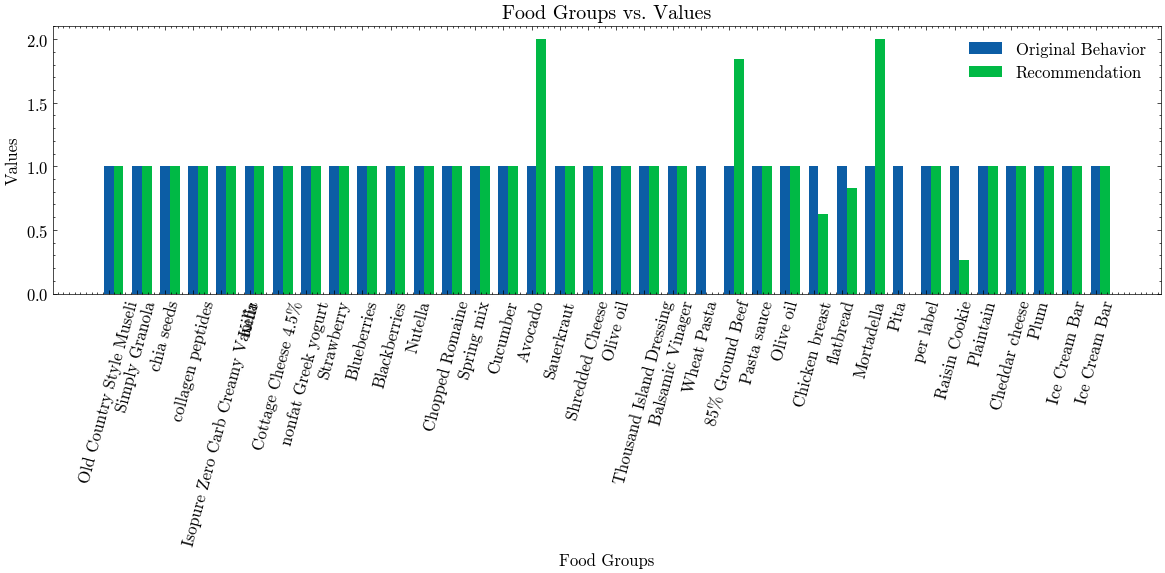

In [46]:
import matplotlib.pyplot as plt
food_items = list(df.FOODS)
food_items_cleaned = [item.split(',')[0] for item in food_items]
food_items_cleaned = [item.split(' - ')[-1] for item in food_items_cleaned]
food_items_cleaned = [item.split('(')[0] for item in food_items_cleaned]
food_items_cleaned = [item.split('\xa0')[0] for item in food_items_cleaned]
# Lists of food groups, first values, and second values
food_groups =food_items_cleaned
first_values = Xi[0]
second_values = Xi[list(Xi.keys())[-1]]

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(food_groups))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})
plt.bar(r1, first_values, width=bar_width, label='Original Behavior')
plt.bar(r2, second_values, width=bar_width, label='Recommendation')

# Add labels and title
plt.xlabel('Food Groups')
plt.ylabel('Values')
plt.title('Food Groups vs. Values')
plt.xticks([r  for r in range(len(food_groups))], food_groups, rotation=75)

# Add legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig(mode+'_Diet_fooditems2_MFP_recommendation.png')
plt.show()

## Figures

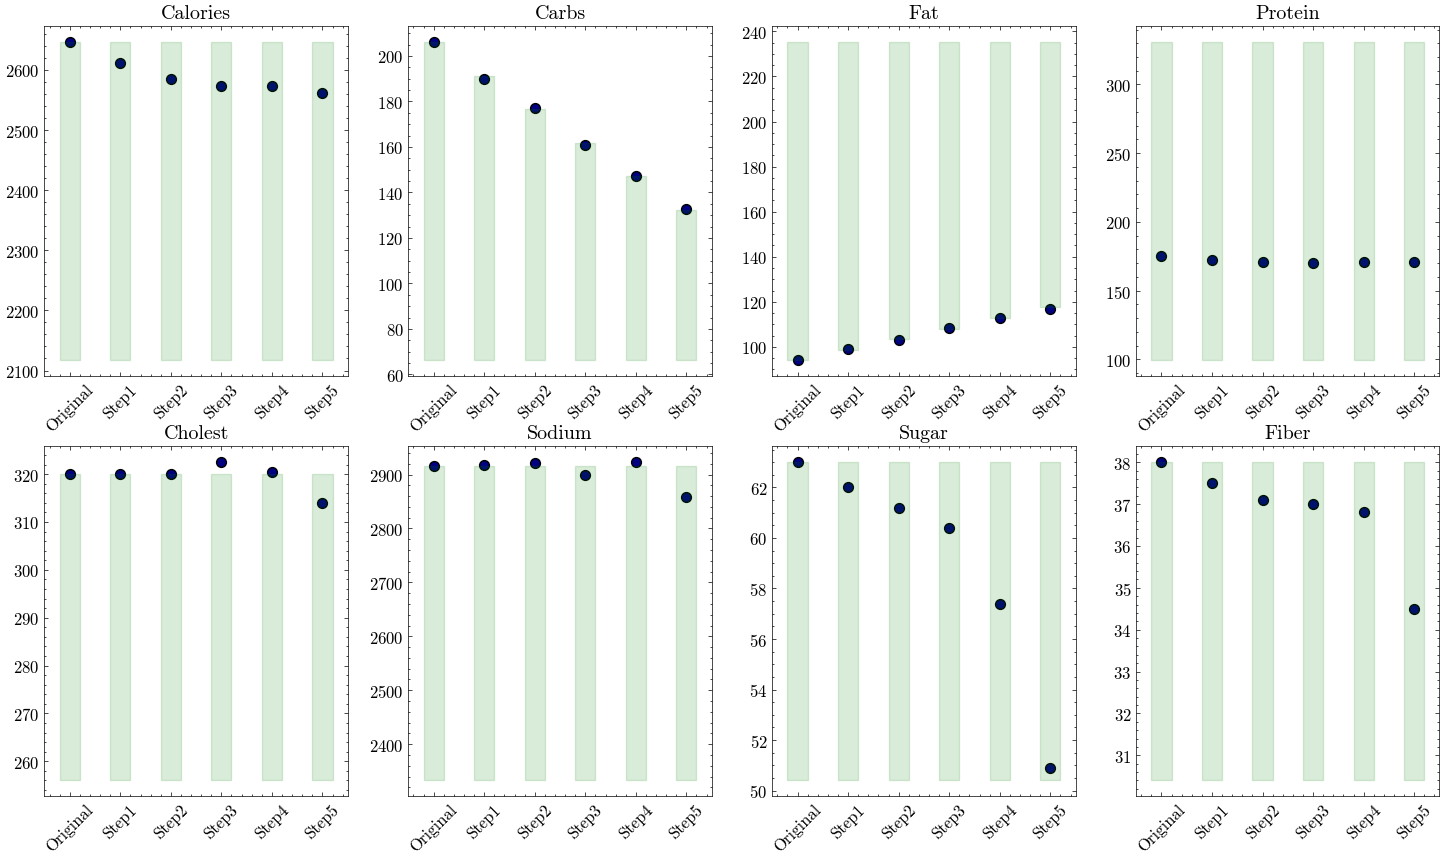

In [47]:
# Rounding all values in the dictionary to 2 decimal places
rounded_data_dict = {k: np.round(v, 1) for k, v in Xi.items()}
Xi = rounded_data_dict

list(Xi.keys())
nutrient_names = list(df.columns[1:])
nutrient_values = {}
for key in Xi.keys():
    nutrient_values[key] = np.dot(A,Xi[key])[0:8]
nutrient_values

a = 2
z = 4
fig, axs = plt.subplots(a,z,figsize=(18, 10))
x_axis = ['Original','Step1','Step2','Step3','Step4','Step5']
s = 50
plt.rcParams.update({'font.size': 12})
nut = 0
for k in range (a):
    for m in range(z):
        axs[k,m].boxplot([[],[],[],[],[],[]],labels = x_axis,widths = 0.7)
        for i in range(len(list(Xi.keys()))):
            axs[k,m].scatter(list(Xi.keys())[i]+1,np.dot(A,Xi[i])[nut] , s=s, edgecolor="black",c="navy") 
            axs[k,m].fill_between([i+0.8,i+1.2], -bi[i][nut+8], bi[i][nut], color='green',alpha = 0.15)
        axs[k,m].set(title=nutrient_names[nut])
        #axs[k,m].fill_between([0.8,5.2], -b[nut+6], b[nut], color='green',alpha = 0.15)
        axs[k, m].tick_params(axis='x', rotation=45)  # Rotate x-ticks by 45 degrees

        nut += 1

plt.savefig(date+mode+'Nutrients.pdf') 
plt.savefig(date+mode+'Nutrients.png')  

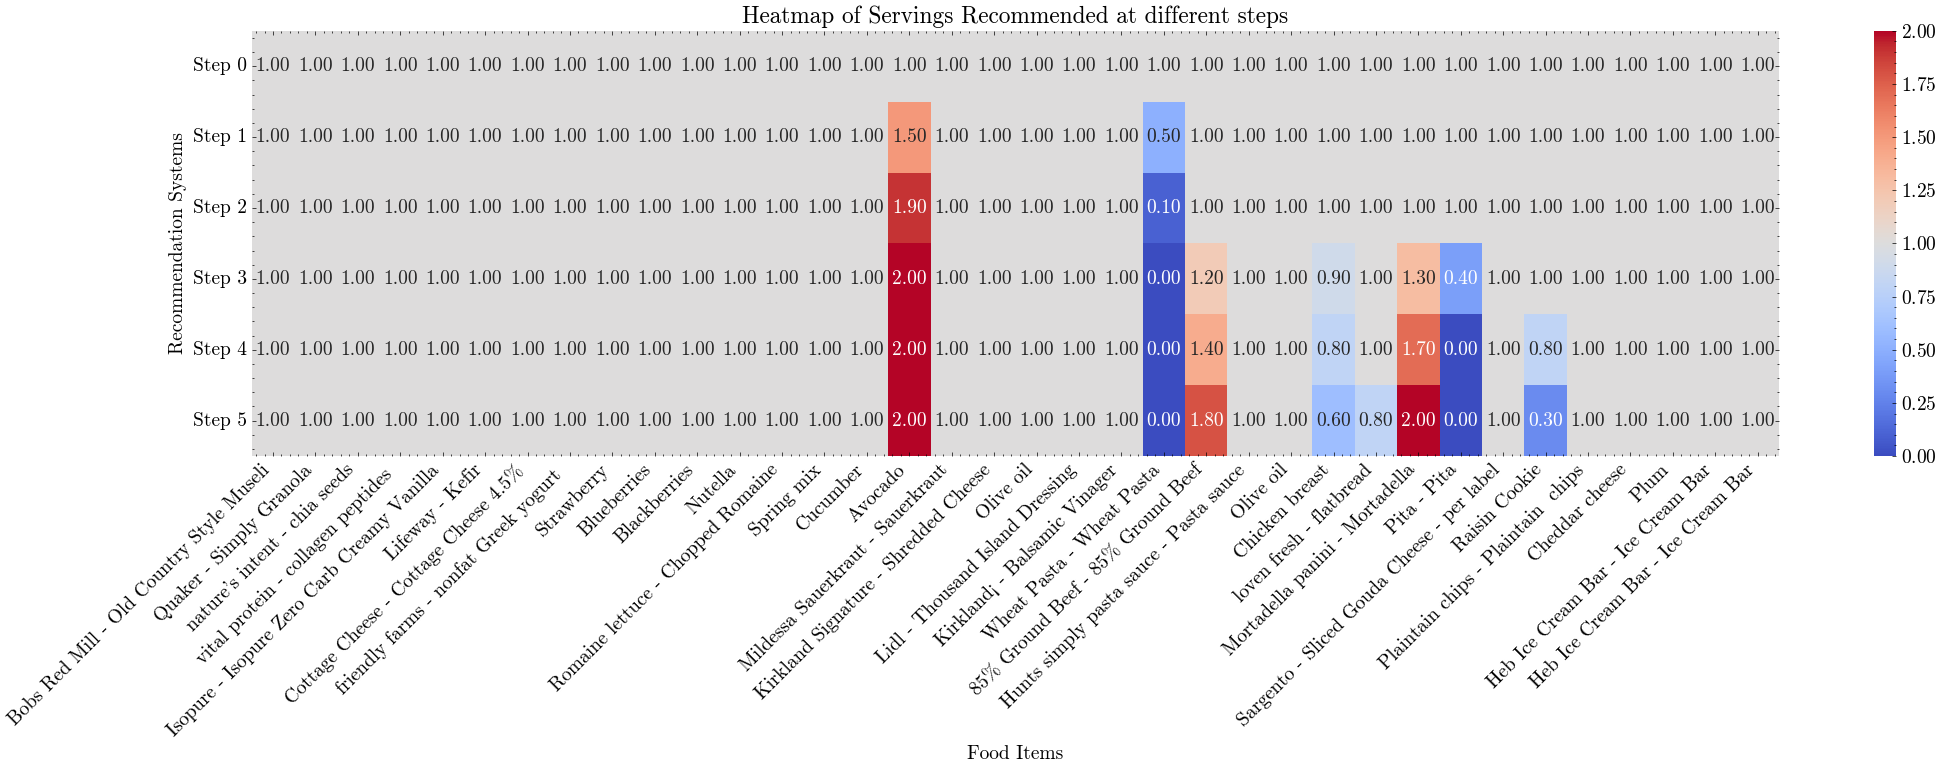

In [48]:
import seaborn as sns

# Data from the dictionary
data = Xi
food_items = list(df.FOODS)
food_items_cleaned = [item.split(',')[0] for item in food_items]

# Convert the data into a format suitable for a heatmap
heatmap_data = np.array([data[i] for i in range(len(data))])

# Create a heatmap
plt.figure(figsize=(22, 8))
plt.rcParams.update({'font.size': 14})
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=food_items_cleaned, yticklabels=[f'Step {i}' for i in range(len(data))])

# Add labels and title
plt.title('Heatmap of Servings Recommended at different steps')
plt.xlabel('Food Items')
plt.ylabel('Recommendation Systems')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything
plt.savefig(date+mode+'Foods.pdf') 
plt.savefig(date+mode+'Foods.png') 
plt.show()

## GIL model

In [49]:
import gurobipy as gp
import dill
from gurobipy import GRB
def GIL(A,b,X,acceptable,p, preffered = np.zeros(A.shape[0])):
    m1 = A.shape[0]
    n = A.shape[1]
    K = X.shape[0]
    AT = A.T
    num_var = 2 * K * n + 3 * n + m1
    e = gp.Env(empty=True)
    e.setParam('WLSACCESSID', 'aee9347f-b4d4-4058-a8c2-a0c6954ea740')
    e.setParam('WLSSECRET', '30cef1f9-9233-48a0-a138-9d092ef2ce32')
    e.setParam('LICENSEID', 862033)
    e.start()
    m = gp.Model("IO",env=e)
    #m.Params.timeLimit = 10.0
    m.Params.OutputFlag = 0
    # Create variables
    e = m.addVars(K,n,  lb=-GRB.INFINITY, name = 'e')
    t = m.addVars(K,n,  lb=-GRB.INFINITY, name = 't')
    y = m.addVars(m1,  lb=-GRB.INFINITY, name = 'y')
    d = m.addVars(n,  lb=-GRB.INFINITY, name = 'd')
    z = m.addVars(n, lb=0, ub = 2, name = 'z')
    acceptable_ind = np.where(np.array(acceptable)==1)[0]
    preffered_ind = np.where(np.array(preffered)==1)[0]
    v = m.addVars(len(acceptable_ind), vtype=GRB.BINARY)
    # Set objective:
    m.setObjective(gp.quicksum(t[k,i] for k in range (K) for i in range(n)) - 1000*gp.quicksum(v[i] for i in preffered_ind) , GRB.MINIMIZE)
    # Constraints 
    for k in range (K):
        m.addConstrs(t[k,i] >= e[k,i] for i in range(n))
        m.addConstrs(t[k,i] >= -e[k,i] for i in range(n))
        m.addConstrs(X[k,i] - e[k,i]  == z[i] for i in range(n))
    for j in range(m1):
        m.addConstr(gp.quicksum(A[j,i] * z[i] for i in range(n)) <= b[j])
    for j in acceptable_ind:
        m.addConstr(v[j]*gp.quicksum(A[j,i] * z[i] for i in range(n)) == v[j]*b[j])
    m.addConstr(gp.quicksum(v[i] for i in acceptable_ind)==p)    
    m.params.NonConvex = 2   
    m.optimize()
    print("GIL Status:", m.status)
    vars = m.getVars()
    #for i in range (n):
    #    print (vars [num_var -1 -(n-1-i)])
#     n = A.shape[1]
    Z = np.zeros (n)
    C = np.zeros (len(acceptable_ind))
    feas = (m.status == GRB.OPTIMAL)
    if feas:
        count = 0
        for V in z.values():
            Z[count] = V.X
            count += 1
        count = 0
        for V in v.values():
            C[count] = V.X #this is a binary vector indicating the binding constraints for the solution found (this is used in determining the cost vector)
            count += 1
        m.dispose()
        return Z, C
    else:
        m.dispose()
        return np.NaN, np.NaN

In [50]:
date = '07132023'
diet_df = pd.read_csv("MyFitnessPal data-Farzin/"+date+".csv")
# Remove the row with "FOODS" name "Breakfast"
diet_df = diet_df[diet_df['FOODS'] != 'Breakfast']
diet_df = diet_df[diet_df['FOODS'] != 'Lunch']
diet_df = diet_df[diet_df['FOODS'] != 'Dinner']
diet_df = diet_df[diet_df['FOODS'] != 'Snacks']
diet_df = diet_df[diet_df['FOODS'] != 'TOTALS']

# Function to clean the data
def clean_data(value):
    if isinstance(value, str):
        # Remove 'g' and 'mg' from the value
        value = value.replace('g', '').replace('mg', '').replace('m', '')
        # Remove any remaining whitespace
        value = value.strip()
        # Replace '--' with 'NaN'
        if value == '--':
            value = 0
    return float(value)

# Apply the clean_data function to the dataframe
diet_df.iloc[:, 1:] = diet_df.iloc[:, 1:].applymap(clean_data)

# nutrients logged for this ID and day
df = diet_df
nutrient_names = list(df.columns[1:])

# observed nutrient values for this ID and day
for nutrient in nutrient_names:
    print (nutrient, df[nutrient].values.sum())

#calculating left hand side matrix of the nutritional constraints
AT= df.iloc[:, [1,2,3,4,5,6,7,8]].astype('float').to_numpy()
AT  = np.column_stack((AT, -AT))
A = AT.T
X0 = np.ones(len(df))
X0

diet_macros = {
    'Dash': {'Carbs': (50, 60), 'Protein': (15, 20), 'Fat': (25, 30), 'Sodium': (1000,1600), 'Cholest': (0, 300)},
    'Low-Carb': {'Carbs': (10, 20), 'Protein': (15, 50), 'Fat': (40, 80)},
    'Low-Fat': {'Carbs': (55, 70), 'Protein': (15, 25), 'Fat': (5, 20)},
    'Keto': {'Carbs': (5, 10), 'Protein': (15, 35), 'Fat': (60, 80)},
    'Mediterranean': {'Carbs': (45, 55), 'Protein': (15, 25), 'Fat': (30, 40), 'Cholest': (0, 300)}
}

calories = diet_df['Calories'].values.astype(float).sum()/100  # You can replace this with your desired value

def modify_macros(diet_dict, calories):
    for diet, macros in diet_dict.items():
        for nutrient, value_range in macros.items():
            lower, upper = value_range
            # Multiply by calories
            if nutrient != 'Sodium' and nutrient != 'Cholest':
                macros[nutrient] = (lower * calories, upper * calories)
            # Divide by 4 for 'Carbs' and 'Protein', and divide by 9 for 'Fat'
            if nutrient == 'Carbs' or nutrient == 'Protein':
                macros[nutrient] = (macros[nutrient][0] / 4, macros[nutrient][1] / 4)
            elif nutrient == 'Fat':
                macros[nutrient] = (macros[nutrient][0] / 9, macros[nutrient][1] / 9)
            # Round the values to 2 decimal places
            macros[nutrient] = (round(macros[nutrient][0], 2), round(macros[nutrient][1], 2))

modify_macros(diet_macros, calories)
diet_macros


#mode = 'weight-loss'
#mode = 'Dash'
#mode = 'Mediterranean'
mode = 'Low-Carb'
#mode = 'Low-Fat'



#creating habits for weight loss and other modes
b = np.zeros (2*len(df.columns[1:]))
nut = 0
if mode == 'weight-loss':
    b = np.zeros (2*len(df.columns[1:]))
    nut = 0
    for column in df.columns[1:]:
        b[nut] = 0.9*df[column].values.astype(float).sum()
        b[nut+len(df.columns[1:])] = -0.7*df[column].values.astype(float).sum()
        nut+=1
else:
    for column in df.columns[1:]:
        if column in diet_macros[mode].keys():
            b[nut] = diet_macros[mode][column][1]
            b[nut+len(df.columns[1:])] = -diet_macros[mode][column][0]
        else:
            b[nut] = df[column].values.astype(float).sum()
            b[nut+len(df.columns[1:])] = -0.8*df[column].values.astype(float).sum()
        nut+=1

Xi = {}
Ci= {}
bi = {}
Xi[0] = X0
bi[0] = b

r = 6
for j in range (r):
    bi[j] = b.copy()
for i in range (b.shape[0]):
    if np.dot(A,Xi[0])[i]- b[i] > 0:
        bi[0][i] = np.dot(A,Xi[0])[i]
        for j in range (r-1):
            bi[j+1][i] = bi[0][i]- (j+1)*(np.dot(A,Xi[0])[i]- b[i])/r
bi[r] = b.copy() 

acceptable = np.ones(A.shape[0])
preffered_indices = [7,8,9,12,13,14]
preffered = {}
for level in range(6):
    preffered[level] = np.zeros(A.shape[0])
    for i in range(level+1):
        preffered[level][preffered_indices[i]] = 1

V_GIL = {}
for i in range (r):
    Xi[i+1], V_GIL[i+1] = GIL(A,bi[list(bi.keys())[-1]],np.array([Xi[i],Xi[i]]),acceptable,i+1,preffered[i])

Calories 2646.0
Carbs 206.0
Fat 94.0
Protein 175.0
Cholest 320.0
Sodium 2916.0
Sugar 63.0
Fiber 38.0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
GIL Status: 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
GIL Status: 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
GIL Status: 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - registered to fa___@jhu.edu
GIL Status: 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 862033
Academic license 862033 - for non-commercial use only - r

/tmp/ipykernel_1584599/3926619910.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  diet_df.iloc[:, 1:] = diet_df.iloc[:, 1:].applymap(clean_data)


In [51]:
Xi

{0: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 1: array([1.        , 1.        , 1.57948718, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        2.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 1.88309775, 1.        , 1.        ,
        0.59945729, 1.        , 2.        , 0.        , 1.        ,
        0.26153846, 0.36373626, 1.        , 1.        , 1.        ,
        1.        ]),
 2: array([1.        , 1.        , 1.57948718, 1.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        2.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 2.        , 1.     

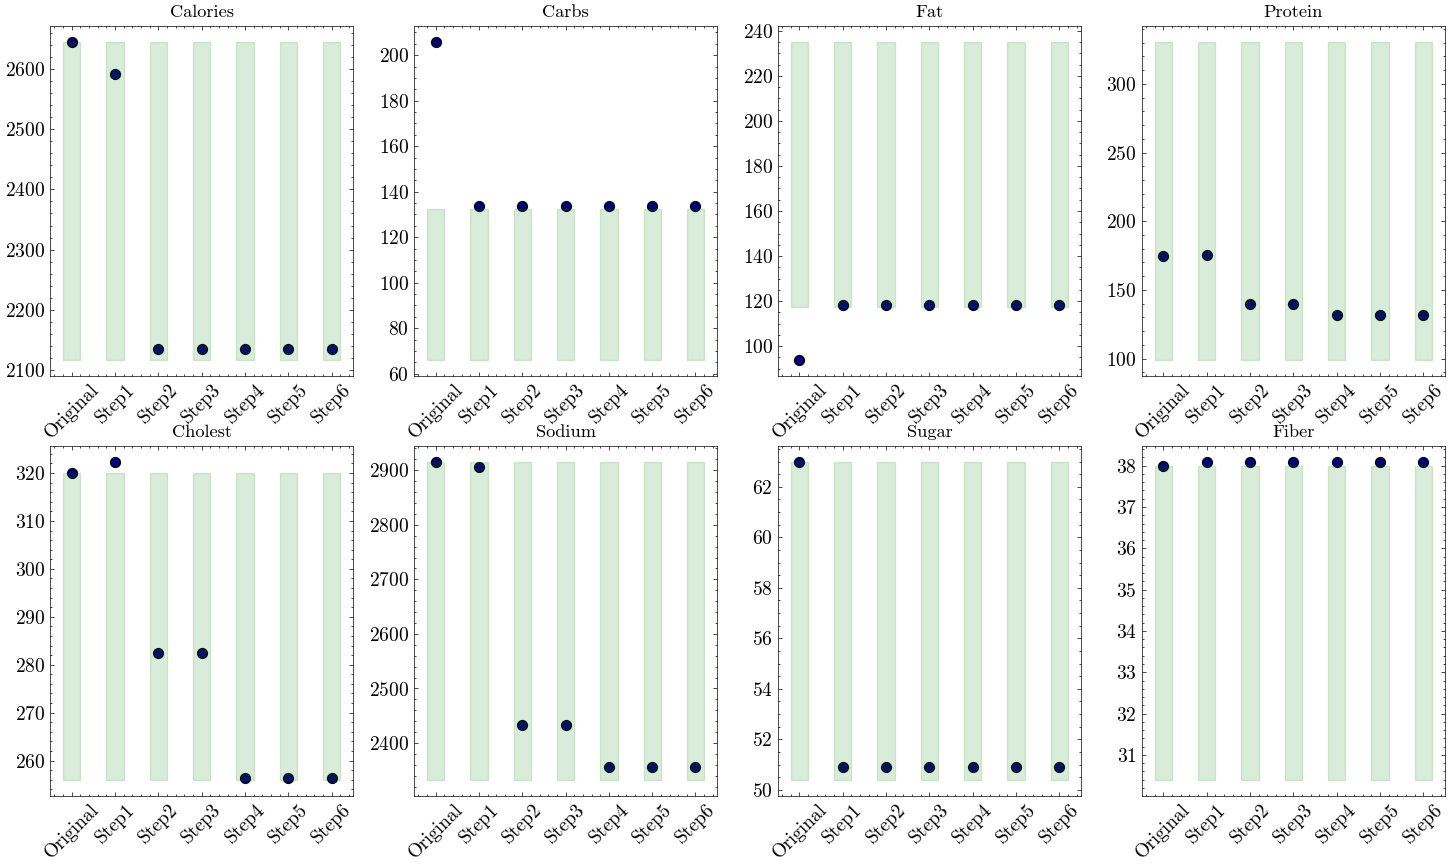

In [52]:
# Rounding all values in the dictionary to 2 decimal places
rounded_data_dict = {k: np.round(v, 1) for k, v in Xi.items()}
Xi = rounded_data_dict

list(Xi.keys())
nutrient_names = list(df.columns[1:])
nutrient_values = {}
for key in Xi.keys():
    nutrient_values[key] = np.dot(A,Xi[key])[0:8]
nutrient_values

a = 2
z = 4
fig, axs = plt.subplots(a,z,figsize=(18, 10))
x_axis = ['Original','Step1','Step2','Step3','Step4','Step5','Step6']
s = 50
plt.rcParams.update({'font.size': 11})
nut = 0
for k in range (a):
    for m in range(z):
        axs[k,m].boxplot([[],[],[],[],[],[],[]],labels = x_axis,widths = 0.7)
        for i in range(len(list(Xi.keys()))):
            axs[k,m].scatter(list(Xi.keys())[i]+1,np.dot(A,Xi[i])[nut] , s=s, edgecolor="black",c="navy") 
            axs[k,m].fill_between([i+0.8,i+1.2], -bi[list(bi.keys())[-1]][nut+8], bi[list(bi.keys())[-1]][nut], color='green',alpha = 0.15)
        axs[k,m].set(title=nutrient_names[nut])
        #axs[k,m].fill_between([0.8,5.2], -b[nut+6], b[nut], color='green',alpha = 0.15)
        axs[k, m].tick_params(axis='x', rotation=45)  # Rotate x-ticks by 45 degrees

        nut += 1

plt.savefig(date+mode+'Nutrients_GIL.pdf') 
plt.savefig(date+mode+'Nutrients_GIL.png')  

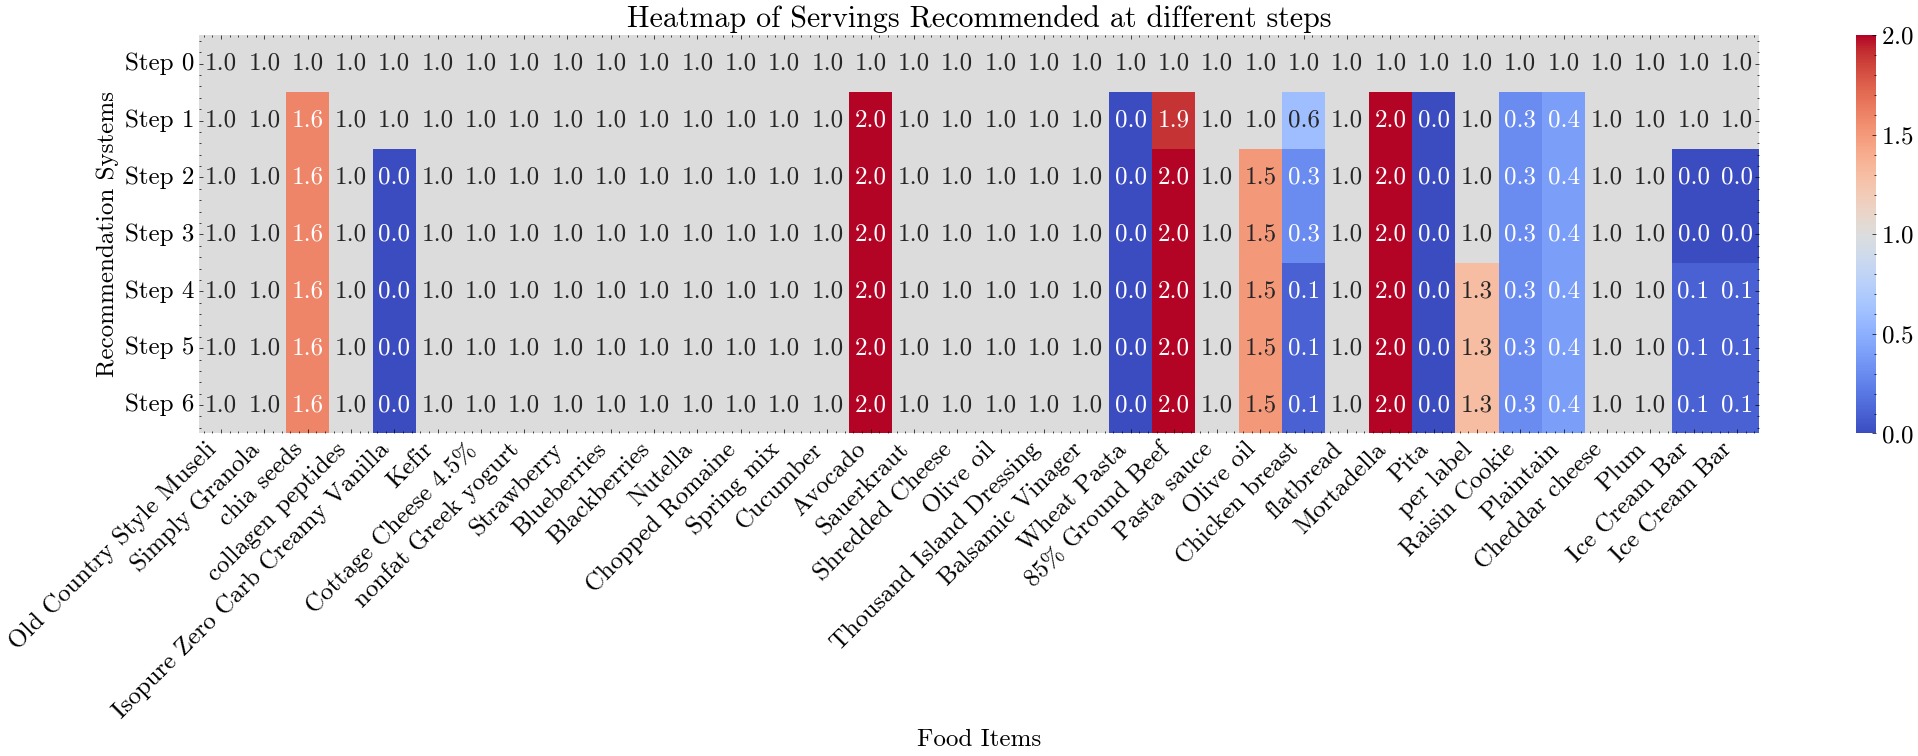

In [53]:
import seaborn as sns

# Data from the dictionary
data = Xi
food_items = list(df.FOODS)
food_items_cleaned = [item.split(',')[0] for item in food_items]
food_items_cleaned = [item.split(' - ')[-1] for item in food_items_cleaned]
food_items_cleaned = [item.split('(')[0] for item in food_items_cleaned]
food_items_cleaned = [item.split('\xa0')[0] for item in food_items_cleaned]


# Convert the data into a format suitable for a heatmap
heatmap_data = np.array([data[i] for i in range(len(data))])

# Create a heatmap
plt.figure(figsize=(22, 8))
plt.rcParams.update({'font.size': 18})
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', xticklabels=food_items_cleaned, yticklabels=[f'Step {i}' for i in range(len(data))])

# Add labels and title
plt.title('Heatmap of Servings Recommended at different steps')
plt.xlabel('Food Items')
plt.ylabel('Recommendation Systems')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything
plt.savefig(date+mode+'Foods_GIL.pdf') 
plt.savefig(date+mode+'Foods_GIL.png') 
plt.show()